In [1]:
using GLMakie

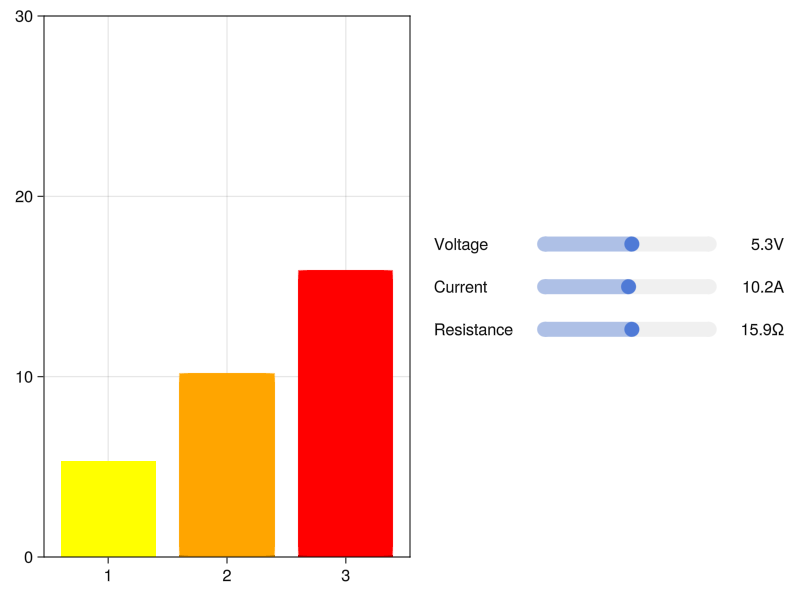

In [2]:
using GLMakie

fig = Figure()

ax = Axis(fig[1, 1])

sg = SliderGrid(
  fig[1, 2],
  (label="Voltage", range=0:0.1:10, format="{:.1f}V", startvalue=5.3),
  (label="Current", range=0:0.1:20, format="{:.1f}A", startvalue=10.2),
  (label="Resistance", range=0:0.1:30, format="{:.1f}Ω", startvalue=15.9),
  width=350,
  tellheight=false)

sliderobservables = [s.value for s in sg.sliders]
bars = lift(sliderobservables...) do slvalues...
  [slvalues...]
end

barplot!(ax, bars, color=[:yellow, :orange, :red])
ylims!(ax, 0, 30)

fig

In [94]:
function kw_set_china()
  (; limits=((70, 140), (15, 55)),
    # yticks=15:10:55, xticks=70:10:140,
    xgridstyle=:dash, ygridstyle=:dash,
    xlabelpadding = 0,
    ylabelpadding = 0,
    # padding=(0, 0, 0, 0),
    # xtickwidth=0.2, ytickwidth=0.2,
    xgridwidth=0.2, ygridwidth=0.2,
    # xticklabelsvisible=false,
    # yticklabelsvisible=false,
    xticklabelfont="Times",
    yticklabelfont="Times")
end

set_theme!(font = "Times")
fig = Figure(figure_padding=(4, 4, 5, 4))

kw = kw_set_china()
letters = collect(['a':'z'; 'A':'Z']) |> x -> string.(x)
# kw = (; xlabelfont="Times", ylabelfont="Times")

nrow, ncol = 4, 3
n = 10
axs = []
for i in 1:nrow, j in 1:ncol
  k = (i - 1) * ncol + j
  if k > n; break; end
  ax = Axis(fig[i, j]; kw...)
  push!(axs, ax)
end
# axs = [Axis(fig[i, j]; kw...) ]

for i in 1:nrow, j in 1:ncol
  # ax = axs[i, j]
  k = (i - 1) * ncol + j
  if k > n; break; end
  
  ax = axs[k]
  tag = "($(letters[k]))"
  hidedecorations!(ax)
  # hidespines!(ax)
  text!(ax, tag, position=(72, 55), align=(:left, :top), font="Times")
end

colgap!(fig.layout, 0)
rowgap!(fig.layout, 0)

# fig
cd("z:/GitHub/geo-julia/makie_abc")
# function write_fig(file="Rplot.pdf", width=10, height=5; show=true)
  # using Plots

width = 10; height = 8
save("a.pdf", fig; resolution = (width*72, height*72))
  # plot!(size=(width * 72, height * 72))
  # savefig(file)
  # if show
  #   show_file(file)
  # end
# end

CairoMakie.Screen{PDF}


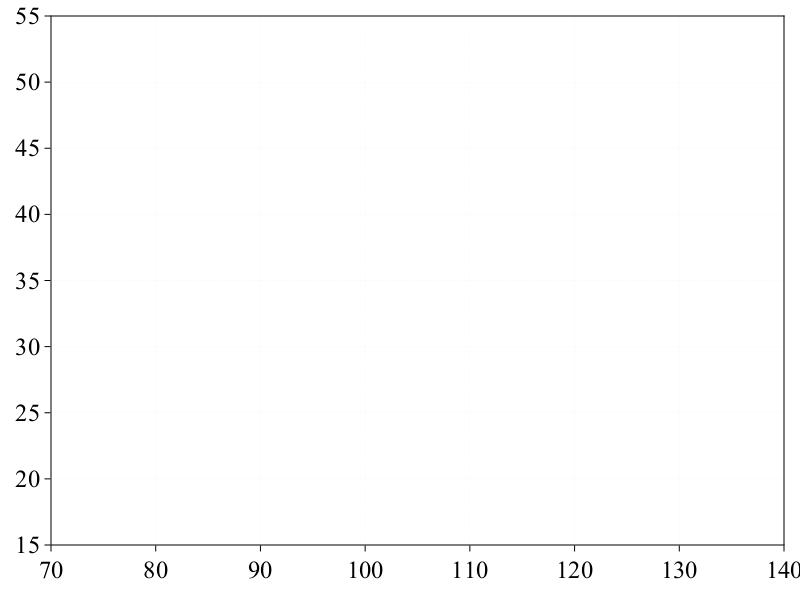

In [82]:
using CairoMakie


kw = (; limits=((70, 140), (15, 55)),
    # yticks=15:10:55, xticks=70:10:140,
    xgridstyle=:dash, ygridstyle=:dash,
    # padding=(0, 0, 0, 0),
    xlabelpadding = 0,
    ylabelpadding = 0,
    # xtickwidth=0.2, ytickwidth=0.2,
    xgridwidth=0.2, ygridwidth=0.2,
    # xticklabelsvisible=false,
    # yticklabelsvisible=false,
    xticklabelfont="Times",
    yticklabelfont="Times")
  
f = Figure(fontsize=24, fonts=(; regular="Dejavu", weird="Blackchancery"))
Axis(f[1, 1]; kw...)  
f

In [98]:
using Makie, Shapefile

f = "//kong-nas/CMIP6/backup_N/Research/cmip5/ChinaHW.R/inst/extdata/shp/bou1_4p_sml.shp"
# 读取 shapefile 文件
shp = Shapefile.Table(f)

# 获取 shapefile 中的几何图形
geoms = Shapefile.shapes(shp)

# 创建一个场景
scene = Scene()

# 循环遍历每个几何图形并将其添加到场景中
for geom in geoms
    # 获取几何图形的坐标
    coords = Shapefile.coordinates(geom)
    
    # 将坐标转换为顶点和三角形索引
    vertices, indices = Makie.meshgrid(coords[:, 1], coords[:, 2])
    
    # 创建一个网格对象并将其添加到场景中
    mesh!(scene, vertices, indices, color=:blue)
end

# 显示场景
display(scene)


UndefVarError: UndefVarError: `coordinates` not defined

┌ Warning: Could not find font regular, using TeX Gyre Heros Makie
└ @ Makie C:\Users\hydro\.julia\packages\Makie\DekzU\src\conversions.jl:991


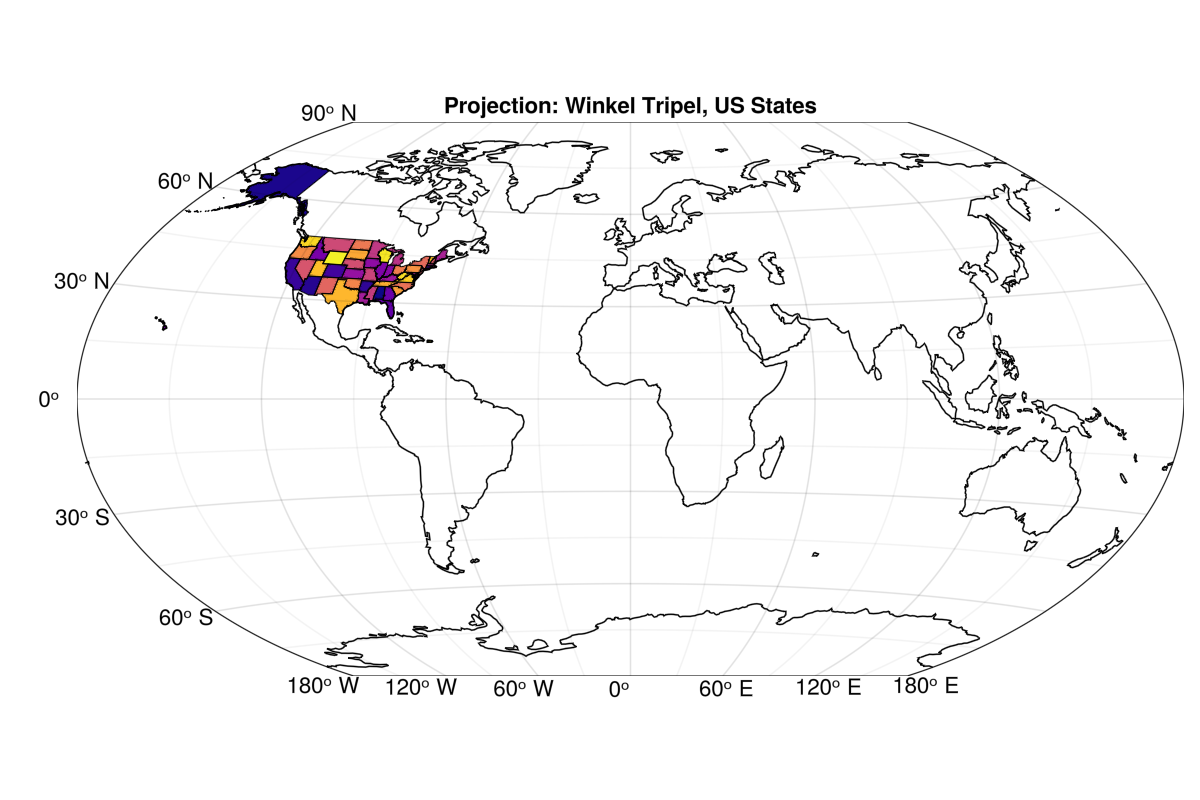

In [102]:
using Makie, GLMakie, GeoMakie
import Downloads
using GeoJSON
using GeoInterface

f = "Z:/Researches/CMIP6/us-states.json"


GLMakie.activate!()
states_geo = GeoJSON.read(read(f, String))
#n = length(GeoInterface.features(states_geo))
n = length(states_geo)

fig = Figure(resolution=(1200, 800), fontsize=22)
ax = GeoAxis(fig[1, 1]; dest="+proj=wintri", coastlines=true,
  title="Projection: Winkel Tripel, US States", tellheight=true)
poly!(ax, states_geo, color=1:n, colormap=:plasma, strokecolor=:black,
  strokewidth=1, overdraw=true, transformation=(:xy, 10))
fig